In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
df = pd.read_excel("shop.xlsx")
df.head()

,Marketing Spend,Administration,Transport,Area,Profit
0,114523.61,136897.80,471784.10,Dhaka,192261.83
1,162597.70,151377.59,443898.53,Ctg,191792.06
2,153441.51,101145.55,407934.54,Rangpur,191050.39
3,144372.41,118671.85,383199.62,Dhaka,182901.99
4,142107.34,91391.77,366168.42,Rangpur,166187.94


In [3]:
df.isnull().sum()

Marketing Spend    0
Administration     0
Transport          1
Area               0
Profit             0
dtype: int64

# Measures of Central Tendency

In [4]:
Mean_Transport = df.Transport.mean()

In [5]:
df.Transport.median()

214634.81

In [6]:
df.Area.mode()

0      Ctg
1    Dhaka
Name: Area, dtype: object

<Axes: ylabel='Count'>

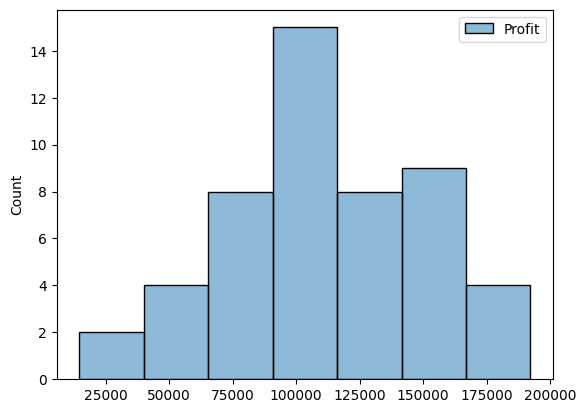

In [7]:
import seaborn as sns
sns.histplot(df[['Profit']])

# Handle Null/NAN value

In [8]:
df.Transport = df.Transport.fillna(Mean_Transport) #null value will replaced with Mean_Transport value


In [9]:
df.isnull().sum()

Marketing Spend    0
Administration     0
Transport          0
Area               0
Profit             0
dtype: int64

In [10]:
df.Transport.iloc[19]   #will return the value of 19th row transport value

215331.7324489796

In [11]:
df1 = df.copy()
df2 = df.copy()
df3 = df.copy()
df4 = df.copy()
df5 = df.copy()
df6 = df.copy()
df7 = df.copy()
df8 = df.copy()
df9 = df.copy()
df10 = df.copy()

# Without Encoding

In [12]:
df1.head()

,Marketing Spend,Administration,Transport,Area,Profit
0,114523.61,136897.80,471784.10,Dhaka,192261.83
1,162597.70,151377.59,443898.53,Ctg,191792.06
2,153441.51,101145.55,407934.54,Rangpur,191050.39
3,144372.41,118671.85,383199.62,Dhaka,182901.99
4,142107.34,91391.77,366168.42,Rangpur,166187.94


In [13]:
area = df.Area.unique()  
area

array(['Dhaka', 'Ctg', 'Rangpur'], dtype=object)

In [14]:
#using replace method-replace each unique value with numerical value
df1.Area = df1.Area.replace(['Dhaka', 'Ctg', 'Rangpur'],[1,2,3])
df1.head()

,Marketing Spend,Administration,Transport,Area,Profit
0,114523.61,136897.80,471784.10,1,192261.83
1,162597.70,151377.59,443898.53,2,191792.06
2,153441.51,101145.55,407934.54,3,191050.39
3,144372.41,118671.85,383199.62,1,182901.99
4,142107.34,91391.77,366168.42,3,166187.94


# Label Encoding

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
le = LabelEncoder()

In [17]:
df2.Area = le.fit_transform(df2.Area)
df2.head()

,Marketing Spend,Administration,Transport,Area,Profit
0,114523.61,136897.80,471784.10,1,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,2,191050.39
3,144372.41,118671.85,383199.62,1,182901.99
4,142107.34,91391.77,366168.42,2,166187.94


# Using loop

In [18]:
import warnings
warnings.filterwarnings("ignore")  #ignore warnings

In [19]:
df3.columns

Index(['Marketing Spend', 'Administration', 'Transport', 'Area', 'Profit'], dtype='object')

In [20]:
for col in df3.columns:
    if df3[col].dtype == np.number:
        continue
    else:
        df3[col] = le.fit_transform(df3[col])
df3.head()        

,Marketing Spend,Administration,Transport,Area,Profit
0,114523.61,136897.80,471784.10,1,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,2,191050.39
3,144372.41,118671.85,383199.62,1,182901.99
4,142107.34,91391.77,366168.42,2,166187.94


# Another Way

In [21]:
from pandas.core.dtypes.common import is_numeric_dtype

In [22]:
for i in df4.columns:
    if is_numeric_dtype(df4[i]):
        continue
    else:
        df4[i] = le.fit_transform(df4[i])
df4.head()        

,Marketing Spend,Administration,Transport,Area,Profit
0,114523.61,136897.80,471784.10,1,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,2,191050.39
3,144372.41,118671.85,383199.62,1,182901.99
4,142107.34,91391.77,366168.42,2,166187.94


# One Hot Encoding

In [23]:
dummy = pd.get_dummies(df5['Area'], columns=df5.Area.unique,dtype=int)
dummy.head()  #generate dummy table for Area Cols

,Ctg,Dhaka,Rangpur
0,0,1,0
1,1,0,0
2,0,0,1
3,0,1,0
4,0,0,1


In [24]:
df5.drop('Area',axis=1,inplace=True)  #drop the area cols
df5.head()

,Marketing Spend,Administration,Transport,Profit
0,114523.61,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [25]:
df6 = pd.concat([df5,dummy],axis=1)

In [26]:
df6.head()

,Marketing Spend,Administration,Transport,Profit,Ctg,Dhaka,Rangpur
0,114523.61,136897.80,471784.10,192261.83,0,1,0
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,0,1
3,144372.41,118671.85,383199.62,182901.99,0,1,0
4,142107.34,91391.77,366168.42,166187.94,0,0,1


# One Hot Encoding using Loop

In [28]:
cols = ['Area']
for col in cols:
    dummy = pd.get_dummies(df7[col],drop_first=True,dtype=int,prefix='Area')
    df8 = pd.concat([df7,dummy],axis=1).drop(col,axis=1)
df8.head()    

,Marketing Spend,Administration,Transport,Profit,Area_Dhaka,Area_Rangpur
0,114523.61,136897.80,471784.10,192261.83,1,0
1,162597.70,151377.59,443898.53,191792.06,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1
3,144372.41,118671.85,383199.62,182901.99,1,0
4,142107.34,91391.77,366168.42,166187.94,0,1


# Ordinal Encoding

In [30]:
from sklearn.preprocessing import OrdinalEncoder
city = df9.Area.unique()
od = OrdinalEncoder(categories=[city])

In [32]:
encoded_values = od.fit_transform(df9[['Area']])

In [33]:
encoded_values

array([[0.],
       [1.],
       [2.],
       [0.],
       [2.],
       [0.],
       [1.],
       [2.],
       [0.],
       [1.],
       [2.],
       [1.],
       [2.],
       [1.],
       [2.],
       [0.],
       [1.],
       [0.],
       [2.],
       [0.],
       [1.],
       [0.],
       [2.],
       [2.],
       [0.],
       [1.],
       [2.],
       [0.],
       [2.],
       [0.],
       [2.],
       [0.],
       [1.],
       [2.],
       [1.],
       [0.],
       [2.],
       [1.],
       [0.],
       [1.],
       [1.],
       [2.],
       [1.],
       [0.],
       [1.],
       [0.],
       [2.],
       [1.],
       [0.],
       [1.]])

In [35]:
encoded_values = pd.DataFrame(encoded_values,columns=['Area'])
encoded_values.head()

,Area
0,0.0
1,1.0
2,2.0
3,0.0
4,2.0


In [36]:
df9 = pd.concat([df9.drop('Area',axis=1),encoded_values],axis=1)

In [37]:
df9.head()

,Marketing Spend,Administration,Transport,Profit,Area
0,114523.61,136897.80,471784.10,192261.83,0.0
1,162597.70,151377.59,443898.53,191792.06,1.0
2,153441.51,101145.55,407934.54,191050.39,2.0
3,144372.41,118671.85,383199.62,182901.99,0.0
4,142107.34,91391.77,366168.42,166187.94,2.0
